In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def filename_gen(year,qint):
    #return a dictionary naming the quarter
    qdict = {}
    if qint==1:
            q_long = "Winter"
            q_short = "WIE"
    elif qint==2:
        q_long = "Spring"
        q_short = "SPE"
    elif qint==3:
        q_long = "Summer"
        q_short = "SUE"
    elif qint==4:
        q_long = "Autumn"
        q_short = "AUE"
    
    qdict["shorthand"] = f"{q_long} {year}"
    qdict["filename"] = f"{year}-{qint}{q_short} {q_long} Quarter {year} End-of-Quarter.xlsx"
    qdict["tablenames"] = [f"TABLE II-A ‐ Part 1\nDeclared Majors of College Students: {q_long} {year} (Students may declare multiple Majors )",
                          f"Table II-A\nDeclared Majors of College Students {q_long} {year}\n(Students may declare multiple majors)",
                          f"Table 2-A\nDeclared Majors of College Students {q_long} {year}\n(Students may declare multiple majors)",
                          f"Table 2-A\nDeclared Majors of College Students (Students may declare multiple majors) {q_long} {year}",
                          f"Table 2A\nDeclared Majors of College Students {q_long} {year}\n(Students may declare multiple majors)",
                          "Major",
                          f"TABLE 2A ‐ Part 1\nDeclared Majors of College Students: {q_long} {year} (Students may declare multiple Majors )",
                          f"Table 2‐A Part 1. Declared Majors of College Students\nCollege students may have multiple majors and minors\n{q_long} {year}",
                          f"TABLE 2A - Part 1\nDeclared Majors of College Students: {q_long} {year} (Students may declare multiple Majors )",
                          f"Table 2‐A Part 1. Declared Majors of College College students may have multiple majors and {q_long} {year}",
                          f"Table 2‐A Part 1. Declared Majors of College Students College students may have multiple majors and minors {q_long} {year}",
                          f"Table 2-A Declared Majors of College Students (Students may declare multiple majors) {q_long} {year}"]
    return qdict

In [20]:
def cleanrow(df,index_1):
    return df.iloc[index_1,:][df.iloc[index_1,:].notnull()]

def first_after(df,row_titles,start_index,get_index=False,col_index=-1):
    indicies = []
    #print(f"find first after {start_index}")
    for title in row_titles:
        #print(title)
        for col in range(len(df.columns)):
            index_list = df[df.iloc[:,col] == title].index.to_list()

            if len(index_list) > 0:
                filtered = list(filter(lambda x : x >= start_index,index_list))
                if len(filtered) > 0:
                    index_1 = filtered[0]
                    indicies.append(index_1)
                    #print(f"found {cleanrow(df,index_1)[-1]} at {index_1}")
    
    #return based on param
    #print("Indicies are",indicies, ", min index is",min(indicies))
    best_guess = min(indicies)
    if get_index:
        return best_guess
    else:
        return cleanrow(data,best_guess)

In [4]:
def findval(df,queries,start_index=0,col_index=-1):
    index = first_after(data,queries,start_index,get_index=True,col_index=col_index)
    value = cleanrow(data,index)[col_index]
    while cleanrow(data,index)[-1] in ["TOTAL","Total","Grand Total"]:
        index = first_after(data,queries,index+1,get_index=True,col_index=col_index)
        value = cleanrow(data,index)[col_index]
    print(value)
    return value

In [5]:
#get summer session data
sumseslist = []
for year in range(2009,2020):
    print(year)
    data = pd.read_excel(f"{year}-3SUE Summer Quarter {year} End-of-Quarter.xlsx")
    queries = ["Pre-Collegiate Summer Student","Pre-Collegiate Summer Scholar","Pre‐Collegiate Summer Student"]
    sumseslist.append(findval(data,queries))

2009
Indicies are [317, 396] , min index is 317
65
2010
Indicies are [318, 400] , min index is 318
73
2011
Indicies are [310, 379] , min index is 310
88
2012
Indicies are [313, 382] , min index is 313
98
2013
Indicies are [315, 395] , min index is 315
77
2014
Indicies are [329, 403] , min index is 329
47
2015
Indicies are [431] , min index is 431
86
2016
Indicies are [388, 518] , min index is 388
136
2017
Indicies are [336] , min index is 336
104.0
2018
Indicies are [198] , min index is 198
66
2019
Indicies are [201] , min index is 201
75


In [6]:
sumsess_out = pd.DataFrame(list(zip(list(range(2009,2020)),sumseslist)),columns=["Year","Summer Session HS Count"])
#out.to_csv("Summer Session HS Enrollment.csv")
sumsess_out

,Year,Summer Session HS Count
0,2009,65.0
1,2010,73.0
2,2011,88.0
3,2012,98.0
4,2013,77.0
5,2014,47.0
6,2015,86.0
7,2016,136.0
8,2017,104.0
9,2018,66.0


In [21]:
#Clean major data

quarter_list = []
year_list = []
q_idc_list = []
cslist = []
totals = []
primarytotals = []
commonyrlist = []
for year in range(2009,2020):
    for qint in range(1,5):
        qdict=filename_gen(year,qint)
        
        quarter_list.append(qdict["shorthand"])
        year_list.append(year)
        q_idc_list.append(qint)
        print(qdict["shorthand"])
        
        #fetch correct dataset
        data = pd.read_excel(qdict["filename"])
        
        #set possible tablenames based on year and qint
        tablenames = qdict["tablenames"]
        
        #find CS relevant rows
        csqueries = ["Computer Science","Comp Sci"]
        totals_queries = ["TOTAL","Grand Total","Total","GRAND TOTAL","Sum","SUM","Sum:","Grand Total"]
        
        #call findval to find rightmost val in row.
        start_index = first_after(data,tablenames,0,get_index=True)
        cy_index = first_after(data,["Common Year"],0,get_index=True)
        
        cslist.append(findval(data,csqueries,start_index=start_index))
        totals.append(findval(data,totals_queries,start_index=cy_index))
        primarytotals.append(findval(data,totals_queries,start_index=cy_index,col_index=1))
        commonyrlist.append(findval(data,["Common Year"],start_index=start_index))

Winter 2009
33
5561
4888
1246
Spring 2009
41
5454
4712
1102
Summer 2009
3
384
331
60
Autumn 2009
35
5721
5098
2201
Winter 2010
32
5659
4970
1950
Spring 2010
38
5664
4848
1402
Summer 2010
4
400
343
91
Autumn 2010
37
5967
5252
2390
Winter 2011
40
5907
5137
2074
Spring 2011
52
5834
4983
1616
Summer 2011
6
411
362
109
Autumn 2011
57
6105
5369
2494
Winter 2012
63
6064
5242
2132
Spring 2012
75
6044
5087
1600
Summer 2012
3
442
373
120
Autumn 2012
91
6504
5607
2562
Winter 2013
90
6506
5507
2157
Spring 2013
115
6460
5334
1529
Summer 2013
4
385
317
79
Autumn 2013
112
6649
5692
2405
Winter 2014
120
6607
5589
2145
Spring 2014
155
6539
5375
1305
Summer 2014
5
370
309
70
Autumn 2014
148
6686
5724
2312
Winter 2015
124
5722
5591
2072
Spring 2015
186
6523
5395
1555
Summer 2015
4
389
334
104
Autumn 2015
175
6803
5860
2634
Winter 2016
196
6811
5757
2106
Spring 2016
235
6703
5539
1484
Summer 2016
12
425
361
91
Autumn 2016
208
6883
5971
2667
Winter 2017
233
6903
5838
2227
Spring 2017
301
6952
5588
1328
Sum

In [26]:
cs = pd.DataFrame(list(zip(quarter_list,year_list,q_idc_list,primarytotals,totals,cslist,commonyrlist)),
                  columns=["Quarter (String)","Year","Quarter Indicator","Tentative Enrollment","Total Majors Count","CS Major Count","Common Year Majors Count"])
#out.to_csv("Summer Session HS Enrollment.csv")

#Add Calculated Columns
cs["plotdate"] = cs["Year"] + 0.25*cs["Quarter Indicator"]
cs["non_cy"] = cs["Total Majors Count"] - cs["Common Year Majors Count"]
cs["cs_pct"] = cs["CS Major Count"] / cs["non_cy"]
cs

,Quarter (String),Year,Quarter Indicator,Tentative Enrollment,Total Majors Count,CS Major Count,Common Year Majors Count,plotdate,non_cy,cs_pct
0,Winter 2009,2009,1,4888,5561,33,1246,2009.25,4315,0.007648
1,Spring 2009,2009,2,4712,5454,41,1102,2009.50,4352,0.009421
2,Summer 2009,2009,3,331,384,3,60,2009.75,324,0.009259
3,Autumn 2009,2009,4,5098,5721,35,2201,2010.00,3520,0.009943
4,Winter 2010,2010,1,4970,5659,32,1950,2010.25,3709,0.008628
5,Spring 2010,2010,2,4848,5664,38,1402,2010.50,4262,0.008916
6,Summer 2010,2010,3,343,400,4,91,2010.75,309,0.012945
7,Autumn 2010,2010,4,5252,5967,37,2390,2011.00,3577,0.010344
8,Winter 2011,2011,1,5137,5907,40,2074,2011.25,3833,0.010436
9,Spring 2011,2011,2,4983,5834,52,1616,2011.50,4218,0.012328


EDITS LOG: Added "TOTAL" header to Spring 2014
    Added Grand Total value to Autumn 2009

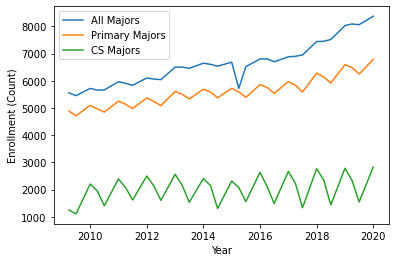

,Year,Tentative Enrollment,Total Majors Count,CS Major Count,Common Year Majors Count,plotdate,non_cy,cs_pct
Quarter Indicator,,,,,,,,
1,2014.0,5558.454545,6480.636364,141.272727,2072.000000,2014.25,4408.636364,0.030013
2,2014.0,5366.454545,6523.636364,174.090909,1445.090909,2014.50,5078.545455,0.031825
4,2014.0,5840.363636,6833.818182,160.454545,2549.181818,2015.00,4284.636364,0.035002


In [33]:
cs_academic_year = cs[(cs["Quarter Indicator"] != 3)]

plt.plot(cs_academic_year["plotdate"],cs_academic_year["Total Majors Count"],label="All Majors")
plt.plot(cs_academic_year["plotdate"],cs_academic_year["Tentative Enrollment"],label="Primary Majors")
plt.plot(cs_academic_year["plotdate"],cs_academic_year["Common Year Majors Count"],label="CS Majors")
plt.ylabel("Enrollment (Count)")
plt.xlabel("Year")
plt.legend()
plt.show()
cs_academic_year.groupby("Quarter Indicator").mean()

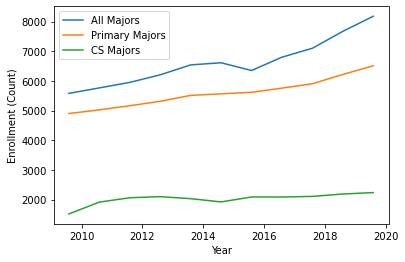

In [34]:
## Smoothed by year
cs_academic_year = cs[(cs["Quarter Indicator"] != 3)].groupby("Year").mean()

plt.plot(cs_academic_year["plotdate"],cs_academic_year["Total Majors Count"],label="All Majors")
plt.plot(cs_academic_year["plotdate"],cs_academic_year["Tentative Enrollment"],label="Primary Majors")
plt.plot(cs_academic_year["plotdate"],cs_academic_year["Common Year Majors Count"],label="CS Majors")
plt.ylabel("Enrollment (Count)")
plt.xlabel("Year")
plt.legend()
plt.show()

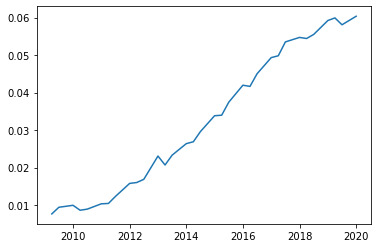

In [29]:
plt.plot(cs_academic_year["plotdate"],cs_academic_year["cs_pct"],label="Percentage of CS Majors")
plt.show()

In [ ]:
cs.to_csv("CS Majors and Total Majors.csv")

In [11]:
############## A Buffer ##############################
###Testing Sandbox###

In [12]:
qdict = filename_gen(2019,4)
data = pd.read_excel(qdict["filename"])

In [13]:
a = data.where(data=="Grand Total").dropna(how='all').dropna(axis=1)
data.iloc[a.index,:].dropna(how="all")

,"AUTUMN QUARTER 2019 STATISTICAL REPORTS\n1427 E. 60th Street Chicago, Illinois 60637 https://registrar.uchicago.edu/data-reporting",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
4,NaN,NaN,NaN,NaN,NaN,NaN,Degree Seeking,NaN,NaN,NaN,...,NaN,NaN,Grand Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Grand Total,NaN,NaN,NaN,NaN,NaN,6790,NaN,NaN,NaN,...,NaN,NaN,17568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Grand Total,529,NaN,543,NaN,NaN,NaN,NaN,460,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Academic Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Academic Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Grand Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Academic Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Grand Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,Grand Total,NaN,NaN,NaN,6790,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,Grand Total,NaN,NaN,NaN,NaN,NaN,NaN,1752,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
b = data.iloc[a.index,:].where(data=="Grand Total").dropna(how='all').dropna(axis=1)
b

""
4
27
124
126
168
194
196
243
426
572


In [15]:
start_index = first_after(data,qdict["tablenames"],0,get_index=True)
start_index

Indicies are [125] , min index is 125


125

In [16]:
findval(data,totals_queries,start_index=cy_index)

Indicies are [194, 196, 574, 168, 668, 632, 718, 668, 668, 668, 780, 194, 196, 574, 168, 668, 632, 718] , min index is 168
Indicies are [194, 196, 574, 668, 632, 718, 668, 668, 668, 780, 194, 196, 574, 668, 632, 718] , min index is 194
8377


8377

In [ ]:
data[data.iloc[:,0] == "Grand Total"]
cleanrow(data,194)